In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Linear Regression

In [3]:
#Y = mX + b +e linear equations m:slope, b:intercept

In [4]:
#Y = B0 + B1X + e

In [8]:
df = pd.read_csv("Estuarine_Crocodile.csv")
df.head()

,Species,CommonName,HeadLength,BodyLength
0,Crocodylus porosus,Estuarine Crocodile,24,161
1,Crocodylus porosus,Estuarine Crocodile,24,179
2,Crocodylus porosus,Estuarine Crocodile,32,226
3,Crocodylus porosus,Estuarine Crocodile,35,259
4,Crocodylus porosus,Estuarine Crocodile,40,287


In [9]:
df["BodyLength"].corr(df["HeadLength"])

0.9898911439276341

In [10]:
df.corr()

,HeadLength,BodyLength
HeadLength,1.000000,0.989891
BodyLength,0.989891,1.000000


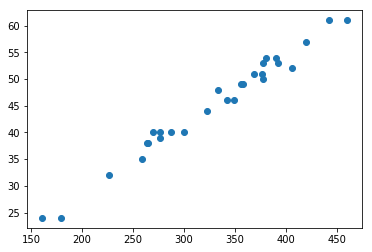

In [12]:
plt.scatter(df["BodyLength"],df["HeadLength"])
plt.show()

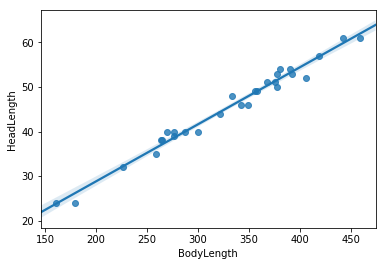

In [14]:
sns.regplot(x="BodyLength",y="HeadLength",data=df)
plt.show()

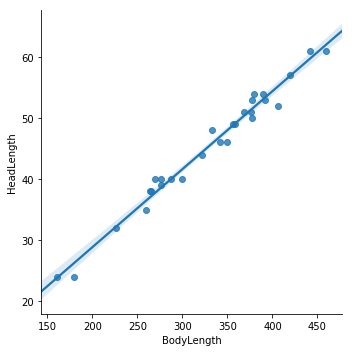

In [16]:
sns.lmplot(x="BodyLength",y="HeadLength",data=df)
plt.show() #linear model

In [18]:
X = df["HeadLength"]
Y = df["BodyLength"]
X

0     24
1     24
2     32
3     35
4     40
5     40
6     46
7     48
8     52
9     61
10    51
11    54
12    38
13    46
14    38
15    49
16    39
17    49
18    40
19    53
20    61
21    53
22    44
23    54
24    50
25    57
26    40
27    51
Name: HeadLength, dtype: int64

In [19]:
X = sm.add_constant(X) # adds constant variable statsmodelin buna ihtiyaci var
print(X)

    const  HeadLength
0     1.0          24
1     1.0          24
2     1.0          32
3     1.0          35
4     1.0          40
5     1.0          40
6     1.0          46
7     1.0          48
8     1.0          52
9     1.0          61
10    1.0          51
11    1.0          54
12    1.0          38
13    1.0          46
14    1.0          38
15    1.0          49
16    1.0          39
17    1.0          49
18    1.0          40
19    1.0          53
20    1.0          61
21    1.0          53
22    1.0          44
23    1.0          54
24    1.0          50
25    1.0          57
26    1.0          40
27    1.0          51


In [20]:
model = sm.OLS(Y,X) #first dependent then independent
print(model)

In [21]:
results = model.fit()
print(results)

In [22]:
results.summary() #coefficient in constant is our intercept, coefficient of headlength is the slope

#intercept= -18, slope=7.6

#98% of the variation in our model can be explained: R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BodyLength   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1267.
Date:                Sat, 07 Nov 2020   Prob (F-statistic):           1.38e-23
Time:                        11:34:07   Log-Likelihood:                -105.32
No. Observations:                  28   AIC:                             214.6
Df Residuals:                      26   BIC:                             217.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2740      9.966     -1.834      0.078     -38.760       2.212
HeadLength     7.6601      0.215     35.588      0.000       7.218       8.103
==============================================================================
Omnibus:                        0.667   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.716   Jarque-Bera (JB):                0.597
Skew:                           0.323   Prob(JB):                        0.742
Kurtosis:                       2.693   Cond. No.                         226.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
i = -18.27
s = 7.66
head = 45

In [27]:
i + (s*head) #body length based on head, head:independent variable, 

326.43

In [33]:
Y_pred = results.predict(X) #our predictions
Y_pred

0     165.568483
1     165.568483
2     226.849320
3     249.829634
4     288.130157
5     288.130157
6     334.090785
7     349.410995
8     380.051413
9     448.992355
10    372.391309
11    395.371623
12    272.809948
13    334.090785
14    272.809948
15    357.071099
16    280.470053
17    357.071099
18    288.130157
19    387.711518
20    448.992355
21    387.711518
22    318.770576
23    395.371623
24    364.731204
25    418.351937
26    288.130157
27    372.391309
dtype: float64

In [29]:
Y #and Y we overestimate for instance the first 161-165.5

0     161
1     179
2     226
3     259
4     287
5     300
6     342
7     333
8     406
9     459
10    376
11    380
12    265
13    349
14    264
15    358
16    276
17    356
18    270
19    392
20    442
21    377
22    322
23    390
24    377
25    419
26    276
27    368
Name: BodyLength, dtype: int64

In [32]:
residuals = Y_pred - Y
residuals #difference between predictions and actual data points

0      4.568483
1    -13.431517
2      0.849320
3     -9.170366
4      1.130157
5    -11.869843
6     -7.909215
7     16.410995
8    -25.948587
9    -10.007645
10    -3.608691
11    15.371623
12     7.809948
13   -14.909215
14     8.809948
15    -0.928901
16     4.470053
17     1.071099
18    18.130157
19    -4.288482
20     6.992355
21    10.711518
22    -3.229424
23     5.371623
24   -12.268796
25    -0.648063
26    12.130157
27     4.391309
dtype: float64

In [35]:
np.mean(residuals**2) #mean squared error, the lower the better

108.32832707593357

In [36]:
np.sqrt(np.mean(residuals**2)) #rmse, root mean squared error

10.40808950172574

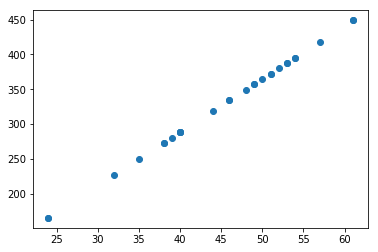

In [39]:
plt.plot(X["HeadLength"],Y_pred,"o") #predicted daha düzy

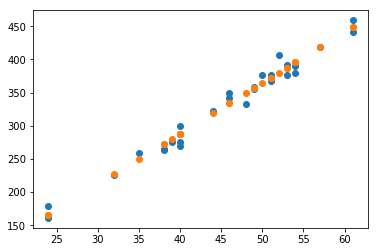

In [41]:
plt.plot(X["HeadLength"],Y,"o") #normal datada düz degil mavi olan
plt.plot(X["HeadLength"],Y_pred,"o") #turuncu olan

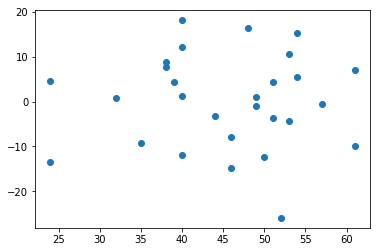

In [42]:
plt.plot(X["HeadLength"],residuals,"o") #residuals, head length karsi, ortalamasi 0 yüksek ihtimal
#sadece random cloud, 0dan yukarda ve asagida residuallarin böyle daginik olmasi iyi anlama gelir

**fitbit dataset**

In [43]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


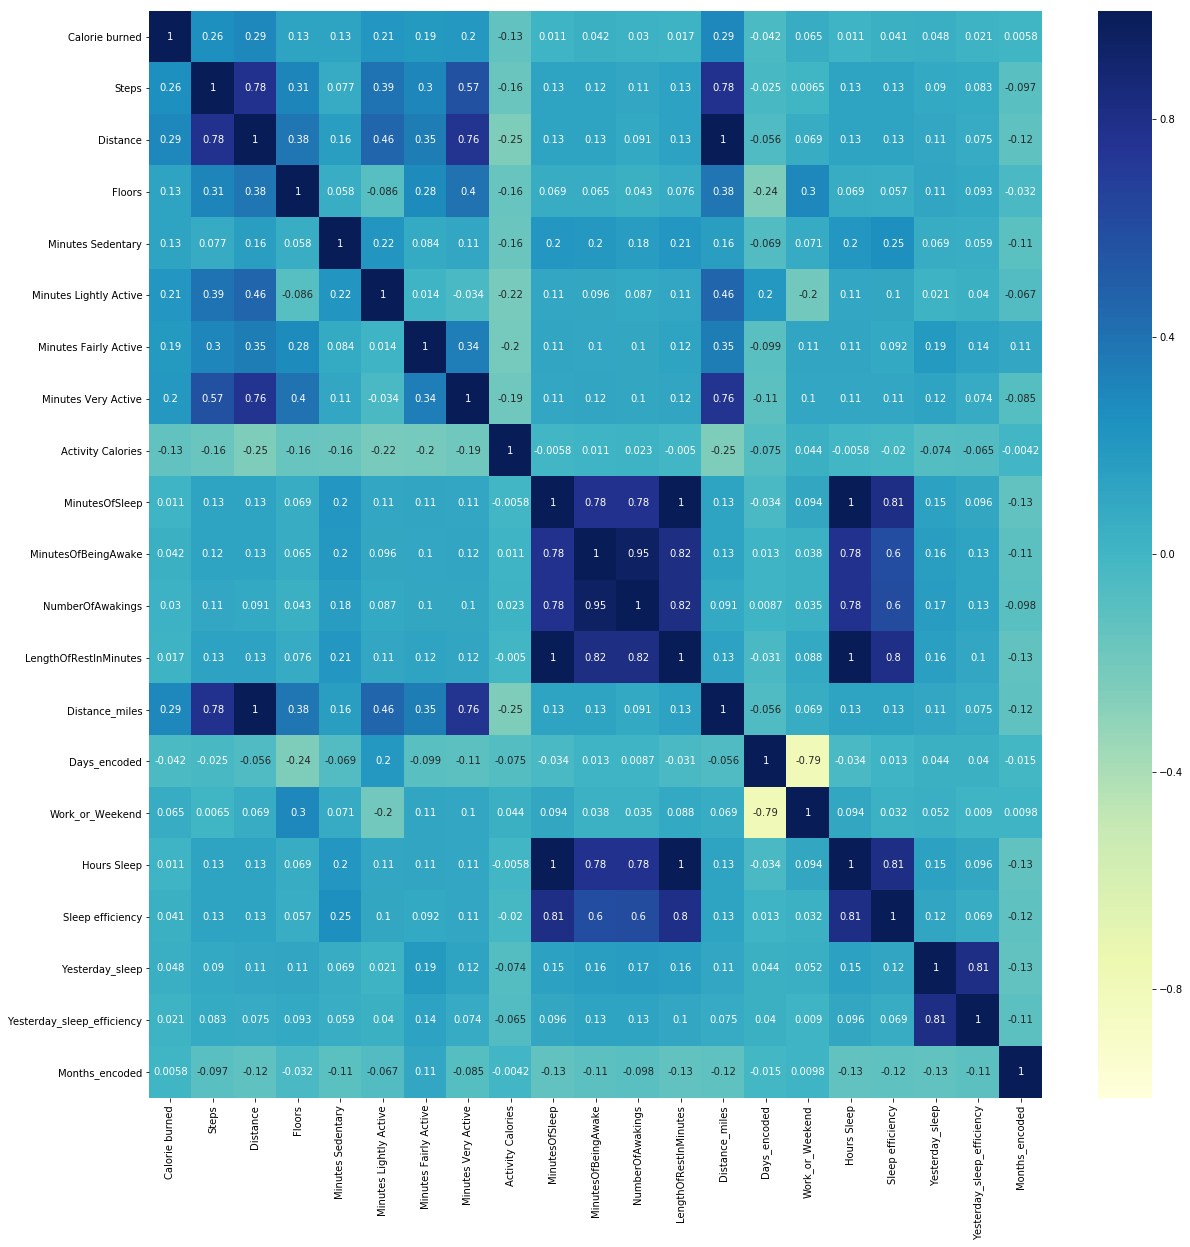

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True,cmap="YlGnBu")
plt.show()

In [89]:
X = data["NumberOfAwakings"]
Y = data["MinutesOfBeingAwake"]

In [90]:
X = sm.add_constant(X) #adding constant

In [91]:
model = sm.OLS(Y,X) #OLS modelling

In [92]:
results = model.fit()

In [93]:
print(results)

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.906
Model:                             OLS   Adj. R-squared:                  0.906
Method:                  Least Squares   F-statistic:                     3516.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          1.89e-189
Time:                         12:47:17   Log-Likelihood:                -1158.1
No. Observations:                  367   AIC:                             2320.
Df Residuals:                      365   BIC:                             2328.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.4381      0.538      2.675      0.008       0.381       2.495
NumberOfAwakings     1.6405      0.028     59.297      0.000       1.586       1.695
==============================================================================
Omnibus:                       17.535   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.142
Skew:                           0.290   Prob(JB):                     1.73e-07
Kurtosis:                       4.304   Cond. No.                         35.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
Y_pred = results.predict(X) #our predictions
Y_pred

0      39.169929
1      35.888900
2      42.450957
3      35.888900
4      73.620726
         ...    
362    30.967358
363    14.562217
364    26.045816
365    37.529415
366    52.294042
Length: 367, dtype: float64

In [96]:
residuals = Y_pred - Y

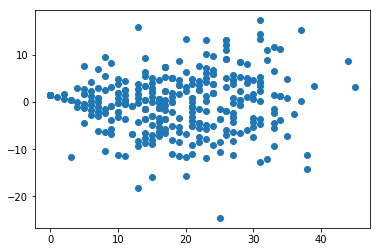

In [99]:
plt.plot(X["NumberOfAwakings"],residuals,"o")

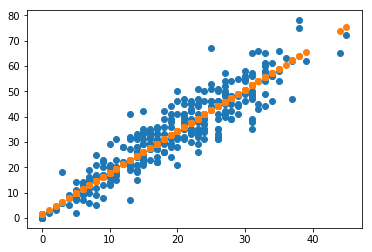

In [100]:
plt.plot(X["NumberOfAwakings"],Y,"o")
plt.plot(X["NumberOfAwakings"],Y_pred,"o")
plt.show()

In [101]:
np.mean(residuals**2)

32.242984271038715

In [102]:
np.sqrt(np.mean(residuals**2))

5.6782906117104215

# Estimating OLS using statsmodels

In [107]:
X = data[["NumberOfAwakings","Distance_miles"]]
Y = data["MinutesOfBeingAwake"]
X = sm.add_constant(X) #adding constant
model = sm.OLS(Y,X) #OLS modelling
results = model.fit()
results.summary()

#df residuals = no.observations - number of coefficient = 364
#sag taraf tamamiyle goodness of fit r-squared`den BICe ye kadar
#adjusted r-squared
#eger ekstra variable ekledigin adjusted r-squared yükseliyorsa o variable yararlidir
#eger yükselmediyse o independent variable regresyondan cikarabilirsin
# overfitting, independent variablelar arasinda da yüksek korealasyon var ise
#variableslar ayni seyi söylememeli bize, burada korealasyon cok yüksek oldugunda böyle bir risk var
# yani multi variable correlation da X1 ve X2 arasinda yüksek korealasyon olmamali
#standard errors = std.dev / sqrt(n) observation kare kökü
#number of observations ne kadar yükselirse standard errors o kadar düsecektir
# t = coeff / std err, bigger t is better
# P-|t| should be lower than 5%
# higher t-statistics makes lower P-|t| - hypothesis test, probabiliy how likely the model is crap
#smaller probability refers better model, significance
# constant yanindaki rakamlar cok önemli degil
# multicollinearity
#overfitness?

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.908
Model:                             OLS   Adj. R-squared:                  0.907
Method:                  Least Squares   F-statistic:                     1794.
Date:                 Sat, 07 Nov 2020   Prob (F-statistic):          3.22e-189
Time:                         13:00:13   Log-Likelihood:                -1154.3
No. Observations:                  367   AIC:                             2315.
Df Residuals:                      364   BIC:                             2326.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5001      0.881     -0.567      0.571      -2.233       1.233
NumberOfAwakings     1.6336      0.028     59.332      0.000       1.579       1.688
Distance_miles       0.3860      0.140      2.761      0.006       0.111       0.661
==============================================================================
Omnibus:                       17.462   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.472
Skew:                           0.270   Prob(JB):                     8.89e-08
Kurtosis:                       4.353   Cond. No.                         60.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
#Y = b0 + b1*X + b2*X
# [MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings] + b2["Distance_miles"]
# [MinutesOfBeingAwake] = b0 + 1.6336*[NumberOfAwakings] + 0.3860["Distance_miles"]